In [23]:
import numpy as np
import pandas as pd

In [24]:
cleavland = pd.read_csv("DSBDALExam DataSets/HeartDisease/Cleavland.csv", header=None)
hungarian = pd.read_csv("DSBDALExam DataSets/HeartDisease/hung.csv", header=None)
switzerland = pd.read_csv("DSBDALExam DataSets/HeartDisease/Switzerland.csv", header=None)

In [25]:
combined = pd.concat([cleavland, hungarian, switzerland])

In [26]:
combined.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

In [27]:
combined

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,70.0,1.0,4.0,115,0,0,1,92,1,0,2,?,7,1
119,70.0,1.0,4.0,140,0,1,0,157,1,2,2,?,7,3
120,72.0,1.0,3.0,160,0,?,2,114,0,1.6,2,2,?,0
121,73.0,0.0,3.0,160,0,0,1,121,0,0,1,?,3,1


In [28]:
%%html
<style/type = "text/css">
.CodeMirror {
    font-size: 17px;
    font-family: Consolas;
}
</style>

In [29]:
combined.replace('?', pd.NA, inplace=True)
combined.dropna(inplace=True)
combined=combined.apply(pd.to_numeric)
combined=combined[(combined>=0).all(1)]

In [30]:
combined

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Objective for each plot:
# a. Histograms: To visualize the distribution of individual variables in the dataset.
# b. Pie Charts: To visualize the proportion of each category within a categorical variable.
# c. Box Plots: To identify outliers and assess the distribution of continuous variables.
# d. Scatter Plots: To visualize the relationship between two continuous variables.
# e. Combined plot (Boxplots on Scatterplot): To assess the distribution of a continuous variable with respect to two other continuous variables.<br>

<Figure size 864x576 with 0 Axes>

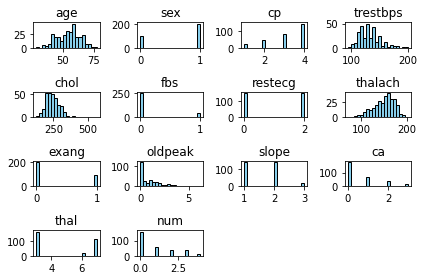

In [36]:
plt.figure(figsize=(12,8))
combined.hist(bins=20, color='skyblue', edgecolor='black', grid=False)
plt.tight_layout()
plt.show()

<Figure size 864x576 with 0 Axes>

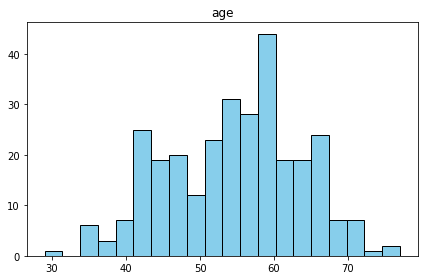

In [37]:
#Histogram
plt.figure(figsize=(12,8))
combined.hist(column='age', bins=20, color='skyblue', edgecolor='black', grid=False)
plt.tight_layout()
plt.show()

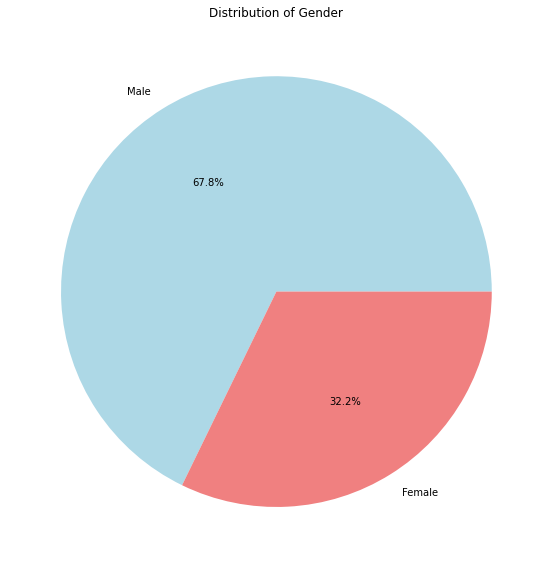

In [41]:
#PieChart
plt.figure(figsize=(8, 8))
sex_counts = combined['sex'].value_counts()
plt.pie(sex_counts, labels=['Male', 'Female'], autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Distribution of Gender')
plt.tight_layout()
plt.show()

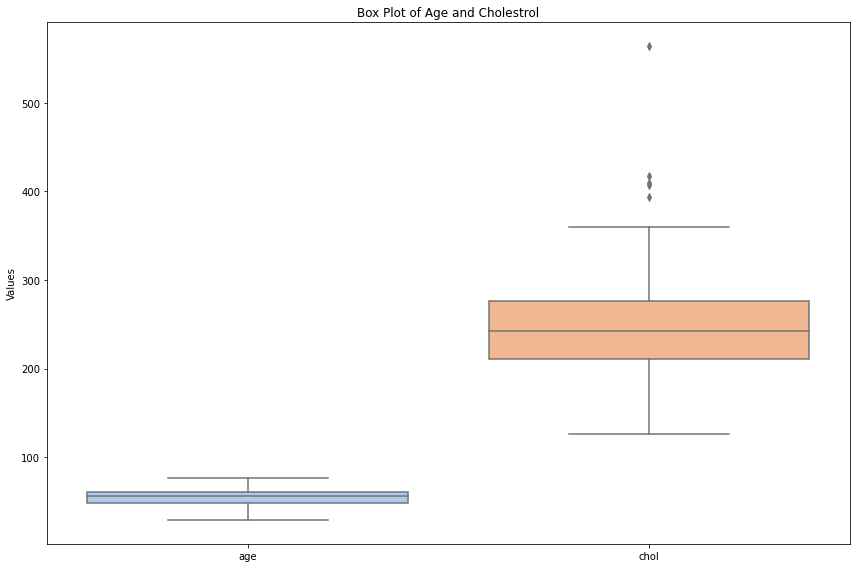

In [42]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=combined[['age', 'chol']], palette='pastel')
plt.title('Box Plot of Age and Cholestrol')
plt.ylabel('Values')
plt.tight_layout()
plt.show()

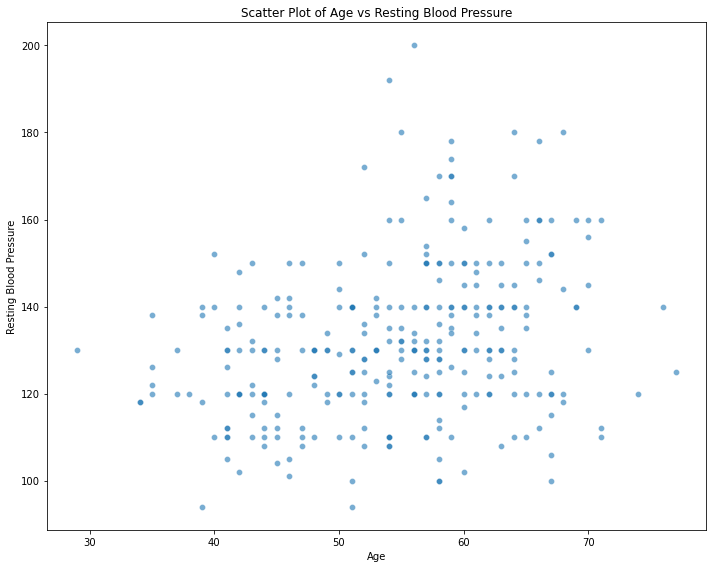

In [46]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='age', y='trestbps', data=combined, alpha=0.6)
plt.title('Scatter Plot of Age vs Resting Blood Pressure')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
plt.tight_layout()
plt.show()

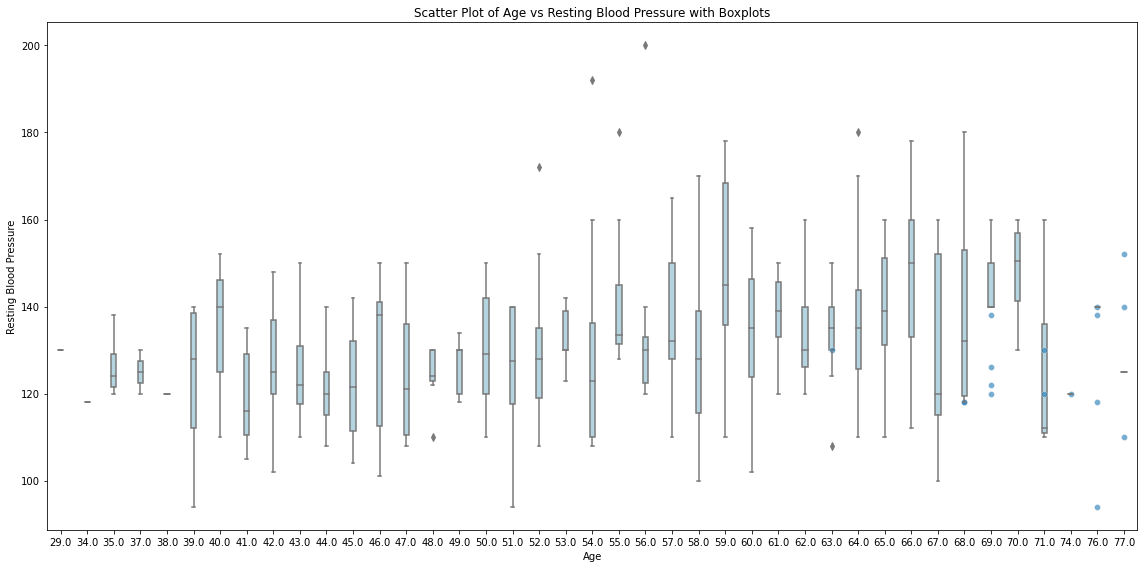

In [51]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x='age', y='trestbps', data=combined, alpha=0.6)
sns.boxplot(x='age', y='trestbps', data=combined, color='lightblue', width=0.2)
plt.title('Scatter Plot of Age vs Resting Blood Pressure with Boxplots')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
plt.tight_layout()
plt.show()